# Jammu & Kashmir Tourism Data Analysis and Revenue Prediction
This project analyzes tourism data from Jammu & Kashmir and uses machine learning to predict future revenue based on visitor statistics.

## ***Project Overview: Tourism Trend Analysis and Prediction for Jammu & Kashmir***


This project focuses on analyzing and predicting tourism trends in Jammu & Kashmir (J&K) using machine learning techniques. 
The primary objective is to understand the factors influencing tourist arrivals, including seasonal patterns, 
domestic vs. foreign tourism, and regional revenue generation. By leveraging historical tourism data,
we aim to develop predictive models that can forecast tourist numbers and revenue for upcoming years, 
helping stakeholders in the tourism industry make informed decisions.

The project includes data exploration, trend analysis, and the application of machine learning algorithms to predict key
metrics such as tourist arrivals, average stay duration, and revenue. The insights derived from this project are aimed at
enhancing tourism management, optimizing resource allocation, and boosting the overall economic impact of tourism in J&K.

**column overview**

**Year:**
The year in which the data was recorded, representing the specific calendar year of tourist activity in Jammu & Kashmir.

**Month:**
The month of the year for which the data is recorded, providing monthly granularity on tourist activity.

**Destination:**
The specific tourist destination in Jammu & Kashmir where the tourists visited. This can include locations like Srinagar, Pahalgam, Gulmarg, Leh, etc.

**Domestic_Visitors:**
The total number of domestic (Indian) tourists who visited Jammu & Kashmir during the specified month and year.

**Foreign_Visitors:**
The total number of foreign tourists who visited Jammu & Kashmir during the specified month and year.

**Revenue_INR:**
The total revenue generated from tourism in Jammu & Kashmir in Indian Rupees (INR) during the specified month and year. This could include revenue from accommodations, activities, transportation, etc.

**Avg_Stay_Days:**
The average number of days tourists stayed in Jammu & Kashmir during the specified month and year.

**Total_Tourists:**
The total number of tourists (both domestic and foreign) who visited Jammu & Kashmir during the specified month and year. This is the sum of Domestic_Visitors and Foreign_Visitors.


**importing  important libraries**

In [420]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**Load the dataset**


In [422]:
df = pd.read_csv(r"C:\Users\rizwan\Downloads\jk_tourism_filtered_with_total.csv")
df.head()

,Year,Month,Destination,Domestic_Visitors,Foreign_Visitors,Revenue_INR,Avg_Stay_Days,Total_Tourists
0,2014,January,Srinagar,13266,4393,119046000,3.2,17659
1,2014,January,Gulmarg,21377,2235,133705000,3.6,23612
2,2014,January,Pahalgam,8755,1634,63383000,3.5,10389
3,2014,January,Leh,20053,2704,132713000,3.2,22757
4,2014,January,Sonamarg,14880,2276,101712000,2.3,17156


In [423]:
# Total Visitors
df['Total_Visitors'] = df['Domestic_Visitors'] + df['Foreign_Visitors']

# Revenue per Visitor
df['Revenue_per_Visitor'] = df['Revenue_INR'] / df['Total_Visitors']

# Foreign Ratio
df['Foreign_Ratio'] = df['Foreign_Visitors'] / df['Total_Visitors']

# Total Tourist Days
df['Total_Tourist_Days'] = df['Total_Visitors'] * df['Avg_Stay_Days']
df

,Year,Month,Destination,Domestic_Visitors,Foreign_Visitors,Revenue_INR,Avg_Stay_Days,Total_Tourists,Total_Visitors,Revenue_per_Visitor,Foreign_Ratio,Total_Tourist_Days
0,2014,January,Srinagar,13266,4393,119046000,3.2,17659,17659,6741.378334,0.248768,56508.8
1,2014,January,Gulmarg,21377,2235,133705000,3.6,23612,23612,5662.586820,0.094655,85003.2
2,2014,January,Pahalgam,8755,1634,63383000,3.5,10389,10389,6100.972182,0.157282,36361.5
3,2014,January,Leh,20053,2704,132713000,3.2,22757,22757,5831.744079,0.118821,72822.4
4,2014,January,Sonamarg,14880,2276,101712000,2.3,17156,17156,5928.654698,0.132665,39458.8
...,...,...,...,...,...,...,...,...,...,...,...,...
1975,2024,December,Anantnag,21566,4338,159886000,5.5,25904,25904,6172.251390,0.167464,142472.0
1976,2024,December,Baramulla,18643,4419,146243000,6.0,23062,23062,6341.297372,0.191614,138372.0
1977,2024,December,Rajouri,9913,3643,93281000,3.4,13556,13556,6881.159634,0.268737,46090.4
1978,2024,December,Budgam,9103,1721,66167000,4.0,10824,10824,6112.989653,0.158999,43296.0


In [424]:
df['Month'] = pd.to_datetime(df['Month'], format='%B').dt.month
df

,Year,Month,Destination,Domestic_Visitors,Foreign_Visitors,Revenue_INR,Avg_Stay_Days,Total_Tourists,Total_Visitors,Revenue_per_Visitor,Foreign_Ratio,Total_Tourist_Days
0,2014,1,Srinagar,13266,4393,119046000,3.2,17659,17659,6741.378334,0.248768,56508.8
1,2014,1,Gulmarg,21377,2235,133705000,3.6,23612,23612,5662.586820,0.094655,85003.2
2,2014,1,Pahalgam,8755,1634,63383000,3.5,10389,10389,6100.972182,0.157282,36361.5
3,2014,1,Leh,20053,2704,132713000,3.2,22757,22757,5831.744079,0.118821,72822.4
4,2014,1,Sonamarg,14880,2276,101712000,2.3,17156,17156,5928.654698,0.132665,39458.8
...,...,...,...,...,...,...,...,...,...,...,...,...
1975,2024,12,Anantnag,21566,4338,159886000,5.5,25904,25904,6172.251390,0.167464,142472.0
1976,2024,12,Baramulla,18643,4419,146243000,6.0,23062,23062,6341.297372,0.191614,138372.0
1977,2024,12,Rajouri,9913,3643,93281000,3.4,13556,13556,6881.159634,0.268737,46090.4
1978,2024,12,Budgam,9103,1721,66167000,4.0,10824,10824,6112.989653,0.158999,43296.0


In [425]:
# Add Season Column based on Month
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Month'].apply(assign_season)

In [426]:
df

,Year,Month,Destination,Domestic_Visitors,Foreign_Visitors,Revenue_INR,Avg_Stay_Days,Total_Tourists,Total_Visitors,Revenue_per_Visitor,Foreign_Ratio,Total_Tourist_Days,Season
0,2014,1,Srinagar,13266,4393,119046000,3.2,17659,17659,6741.378334,0.248768,56508.8,Winter
1,2014,1,Gulmarg,21377,2235,133705000,3.6,23612,23612,5662.586820,0.094655,85003.2,Winter
2,2014,1,Pahalgam,8755,1634,63383000,3.5,10389,10389,6100.972182,0.157282,36361.5,Winter
3,2014,1,Leh,20053,2704,132713000,3.2,22757,22757,5831.744079,0.118821,72822.4,Winter
4,2014,1,Sonamarg,14880,2276,101712000,2.3,17156,17156,5928.654698,0.132665,39458.8,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,2024,12,Anantnag,21566,4338,159886000,5.5,25904,25904,6172.251390,0.167464,142472.0,Winter
1976,2024,12,Baramulla,18643,4419,146243000,6.0,23062,23062,6341.297372,0.191614,138372.0,Winter
1977,2024,12,Rajouri,9913,3643,93281000,3.4,13556,13556,6881.159634,0.268737,46090.4,Winter
1978,2024,12,Budgam,9103,1721,66167000,4.0,10824,10824,6112.989653,0.158999,43296.0,Winter


In [427]:
# Explore the dataset
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 1980 non-null   int64  
 1   Month                1980 non-null   int32  
 2   Destination          1980 non-null   object 
 3   Domestic_Visitors    1980 non-null   int64  
 4   Foreign_Visitors     1980 non-null   int64  
 5   Revenue_INR          1980 non-null   int64  
 6   Avg_Stay_Days        1980 non-null   float64
 7   Total_Tourists       1980 non-null   int64  
 8   Total_Visitors       1980 non-null   int64  
 9   Revenue_per_Visitor  1980 non-null   float64
 10  Foreign_Ratio        1980 non-null   float64
 11  Total_Tourist_Days   1980 non-null   float64
 12  Season               1980 non-null   object 
dtypes: float64(4), int32(1), int64(6), object(2)
memory usage: 193.5+ KB


Year                   0
Month                  0
Destination            0
Domestic_Visitors      0
Foreign_Visitors       0
Revenue_INR            0
Avg_Stay_Days          0
Total_Tourists         0
Total_Visitors         0
Revenue_per_Visitor    0
Foreign_Ratio          0
Total_Tourist_Days     0
Season                 0
dtype: int64

**Visualization data**

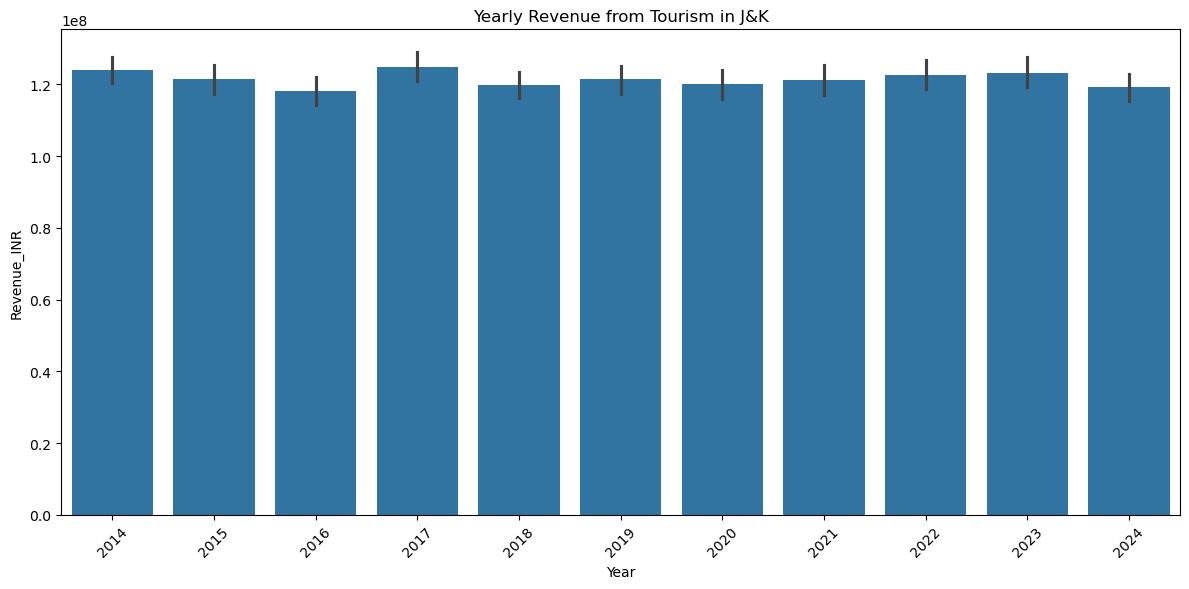

In [429]:
# Visualize revenue trends over the years
plt.figure(figsize=(12,6))
sns.barplot(x='Year', y='Revenue_INR', data=df)
plt.title('Yearly Revenue from Tourism in J&K')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Yearly revenue generated from tourism in Jammu & Kashmir, based on the 'Revenue_INR' column**
**The graph illustrates the financial impact of tourism over the years, showcasing trends in revenue growth or decline in relation to the number**
**of tourists visiting the region**

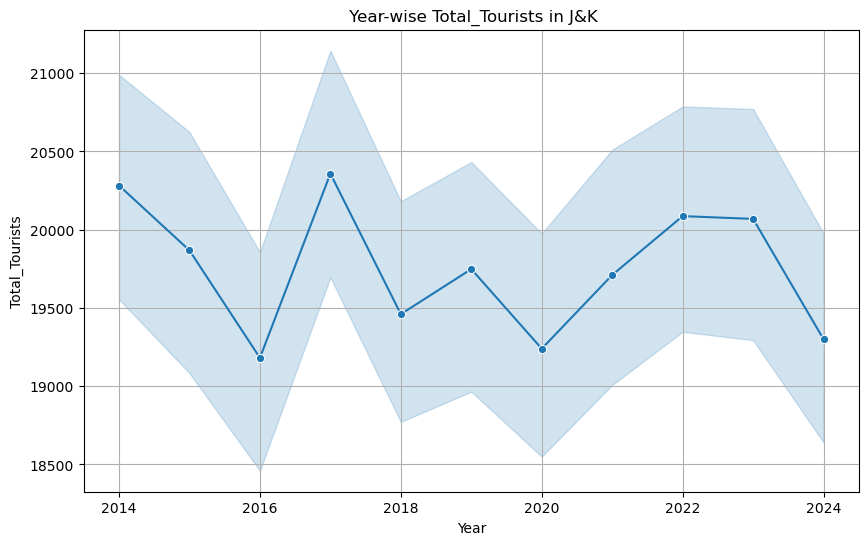

In [431]:
#Year-wise Total_Tourists in J&K
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Year', y='Total_Tourists', marker='o')
plt.title(" Year-wise Total_Tourists in J&K")
plt.ylabel("Total_Tourists")
plt.grid(True)
plt.show()


**Year-wise total number of tourists visiting Jammu & Kashmir, based on the data from the Total_Tourists column.**
**The graph highlights the trends and fluctuations in tourist arrivals across different years.**

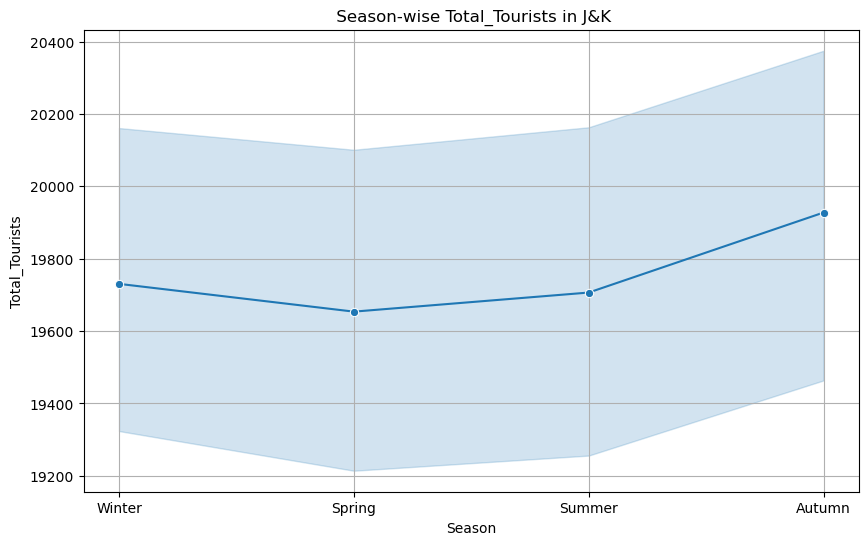

In [433]:
#Season-wise Total_Tourists in J&K
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Season', y='Total_Tourists', marker='o')
plt.title(" Season-wise Total_Tourists in J&K")
plt.ylabel("Total_Tourists")
plt.grid(True)
plt.show()

**Season-wise total number of tourists visiting Jammu & Kashmir, based on the data from the Total_Tourists column.**
**The graph illustrates how tourism varies across different seasons, highlighting peak and off-peak tourist periods.**

C:\Users\rizwan\AppData\Local\Temp\ipykernel_12656\1606198608.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Destination', y='Total_Tourists', estimator=sum, ci=None)


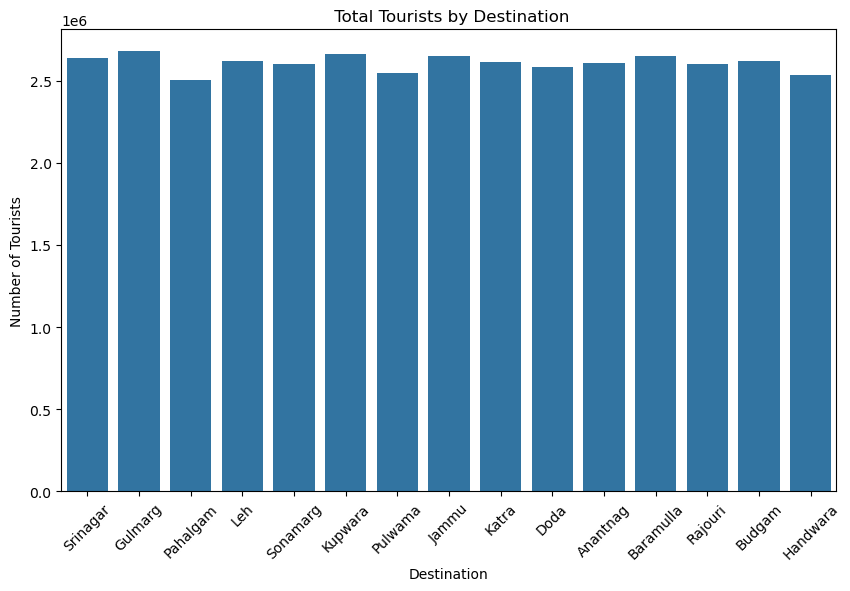

In [435]:
#Total_Tourists by Distination in J&K
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Destination', y='Total_Tourists', estimator=sum, ci=None)
plt.title(" Total Tourists by Destination")
plt.ylabel("Number of Tourists")
plt.xticks(rotation=45)
plt.show()

**Total number of tourists visiting different destinations in Jammu & Kashmir**
**based on the data from the 'Total_Tourists' column. The graph provides insights into the most and least visited destinations** 
**showcasing the distribution of tourists across the region.**

<Figure size 1200x600 with 0 Axes>

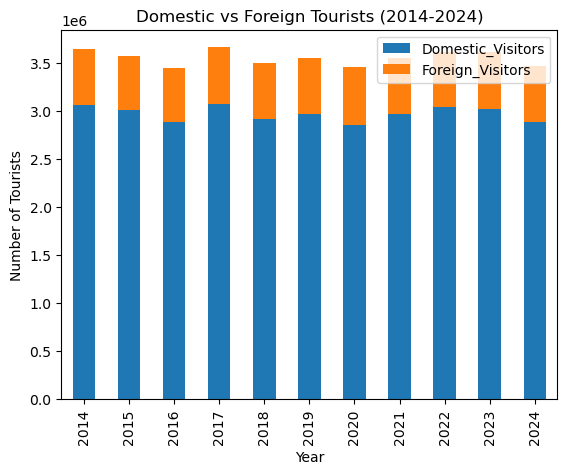

In [437]:
#Domestic vs Foreign Tourists (2014-2024)
plt.figure(figsize=(12,6))
df.groupby('Year')[['Domestic_Visitors', 'Foreign_Visitors']].sum().plot(kind='bar', stacked=True)
plt.title('Domestic vs Foreign Tourists (2014-2024)')
plt.ylabel('Number of Tourists')
plt.show()

**Comparison of domestic and foreign tourist arrivals in Jammu & Kashmir from 2014 to 2024**
**The graph highlights trends in the number of domestic versus foreign visitors**
**showing shifts in tourism patterns and preferences over the years**

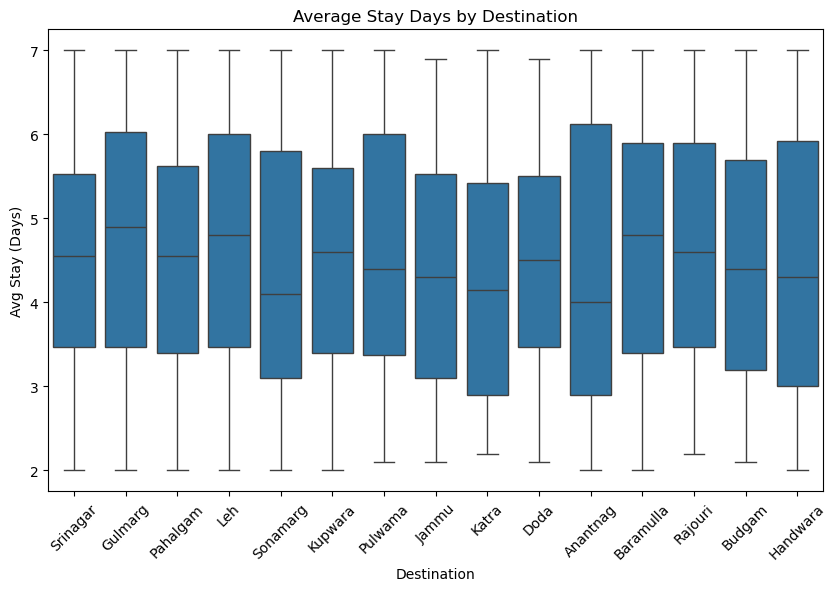

In [439]:
#Average stay days by distination
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Destination', y='Avg_Stay_Days')
plt.title("Average Stay Days by Destination")
plt.ylabel("Avg Stay (Days)")
plt.xticks(rotation=45)
plt.show()

**Average number of stay days per tourist in Jammu & Kashmir, based on the data from the 'Avg_Stay_Days**
**column. The graph reflects the typical duration of tourist visits, offering insights into the length of stay across different years or seasons.**



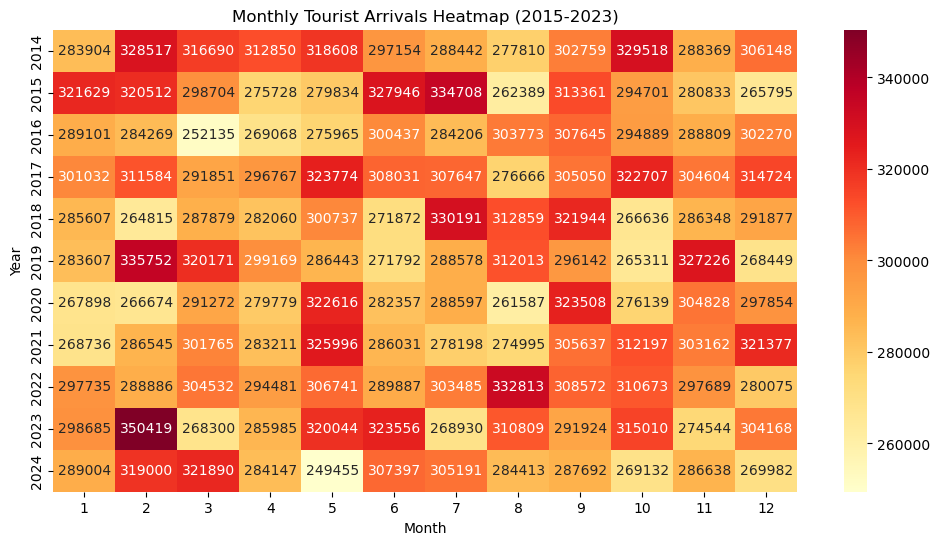

In [441]:
#Pivot data for heatmap
heatmap_data = df.pivot_table(index='Year', columns='Month', 
                             values='Total_Tourists', aggfunc='sum')

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Monthly Tourist Arrivals Heatmap (2015-2023)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

**Heatmap showing the monthly distribution of tourist arrivals in**
**Jammu & Kashmir from 2015 to 2023 and Total_Tourists per month. The heatmap highlights trends in tourist activity throughout the year** 
**with color intensity representing the volume of arrivals each month across multiple years**

In [443]:
print(df["Destination"].value_counts())

Destination
Srinagar     132
Gulmarg      132
Pahalgam     132
Leh          132
Sonamarg     132
Kupwara      132
Pulwama      132
Jammu        132
Katra        132
Doda         132
Anantnag     132
Baramulla    132
Rajouri      132
Budgam       132
Handwara     132
Name: count, dtype: int64


In [444]:
print(df["Season"].value_counts())

Season
Winter    495
Spring    495
Summer    495
Autumn    495
Name: count, dtype: int64


In [445]:
numaric=df[['Domestic_Visitors','Foreign_Visitors','Revenue_INR','Avg_Stay_Days','Total_Tourists','Total_Visitors','Revenue_per_Visitor','Foreign_Ratio',	'Total_Tourist_Days']]
categorical=df[["Destination","Month","Season"]]

In [446]:
categorical["Destination"]=categorical["Destination"].replace({"Srinagar":0,"Gulmarg":1,"Pahalgam":2,"Leh":3,"Sonamarg":4,"Kupwara":5,"Pulwama":6,"Jammu":7
                                                              ,"Katra":8,"Doda":9,"Anantnag":10,"Baramulla":11,"Rajouri":12,"Budgam":13,"Handwara":14})
categorical["Season"]=categorical["Season"].replace({"Winter":1,"Spring":2,"Summer":3,"Autumn":4})

C:\Users\rizwan\AppData\Local\Temp\ipykernel_12656\3876461711.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  categorical["Destination"]=categorical["Destination"].replace({"Srinagar":0,"Gulmarg":1,"Pahalgam":2,"Leh":3,"Sonamarg":4,"Kupwara":5,"Pulwama":6,"Jammu":7
C:\Users\rizwan\AppData\Local\Temp\ipykernel_12656\3876461711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical["Destination"]=categorical["Destination"].replace({"Srinagar":0,"Gulmarg":1,"Pahalgam":2,"Leh":3,"Sonamarg":4,"Kupwara":5,"Pulwa

In [447]:
categorical

,Destination,Month,Season
0,0,1,1
1,1,1,1
2,2,1,1
3,3,1,1
4,4,1,1
...,...,...,...
1975,10,12,1
1976,11,12,1
1977,12,12,1
1978,13,12,1


In [448]:
#pearson corelation test we use this because dependant and independant are both numaric
x=numaric.corr()
print(x)

                     Domestic_Visitors  Foreign_Visitors  Revenue_INR  \
Domestic_Visitors             1.000000         -0.002113     0.895839   
Foreign_Visitors             -0.002113          1.000000     0.442484   
Revenue_INR                   0.895839          0.442484     1.000000   
Avg_Stay_Days                 0.036513         -0.043467     0.013428   
Total_Tourists                0.979326          0.200219     0.967212   
Total_Visitors                0.979326          0.200219     0.967212   
Revenue_per_Visitor          -0.690040          0.690566    -0.311940   
Foreign_Ratio                -0.690040          0.690566    -0.311940   
Total_Tourist_Days            0.615251          0.092894     0.593024   

                     Avg_Stay_Days  Total_Tourists  Total_Visitors  \
Domestic_Visitors         0.036513        0.979326        0.979326   
Foreign_Visitors         -0.043467        0.200219        0.200219   
Revenue_INR               0.013428        0.967212        0

<Axes: >

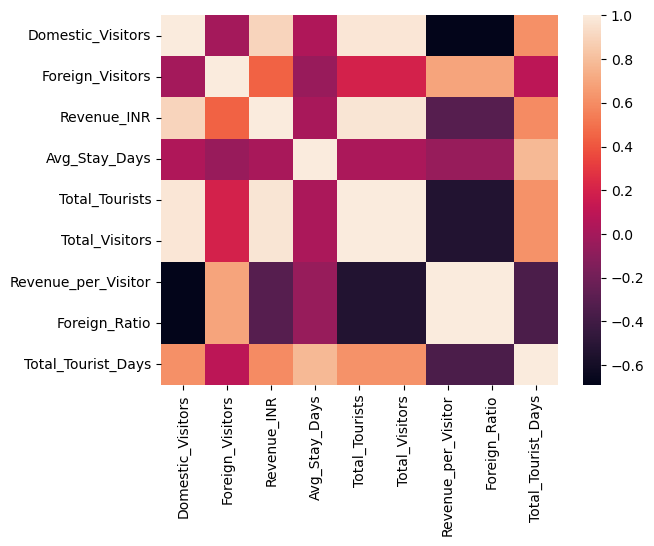

In [449]:
import seaborn
seaborn.heatmap(x)

**After analysing this heatmap the strong relacationship is**
**Total_Tourists ↔ Total_Visitors → nearly 1.0**

**Total_Visitors ↔ Total_Tourist_Days**

**Revenue_INR ↔ Domestic_Visitors**

**Total_Tourists ↔ Total_Tourist_Days**

In [451]:
print(df["Revenue_per_Visitor"].skew())

0.6411738516678662


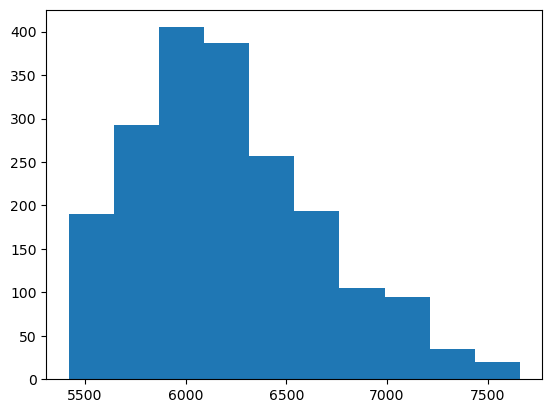

In [452]:
plt.hist(df["Revenue_per_Visitor"])
plt.show()

In [453]:
#ANOVA----------> analysis of virance
from sklearn.feature_selection import f_classif,SelectKBest
select=SelectKBest(f_classif,k=3)
column=select.fit_transform(categorical,numaric["Revenue_INR"])
selected=select.get_support(indices=True)
print(selected)
print(categorical.columns)
print(select.scores_)

[0 1 2]
Index(['Destination', 'Month', 'Season'], dtype='object')
[1.08934206 0.80139492 0.74006696]


In [454]:
print(df.dtypes)

Year                     int64
Month                    int32
Destination             object
Domestic_Visitors        int64
Foreign_Visitors         int64
Revenue_INR              int64
Avg_Stay_Days          float64
Total_Tourists           int64
Total_Visitors           int64
Revenue_per_Visitor    float64
Foreign_Ratio          float64
Total_Tourist_Days     float64
Season                  object
dtype: object


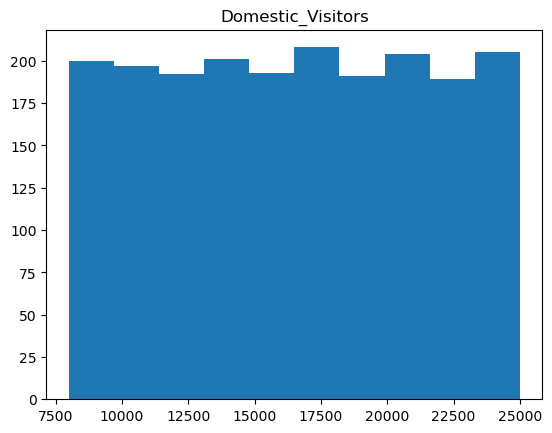

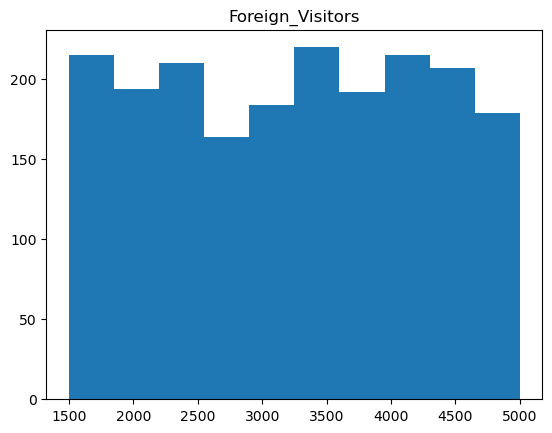

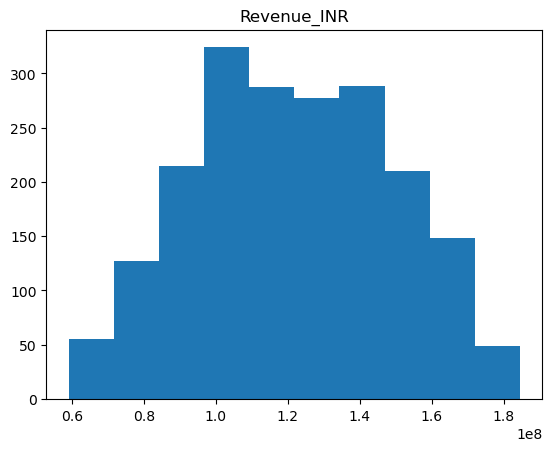

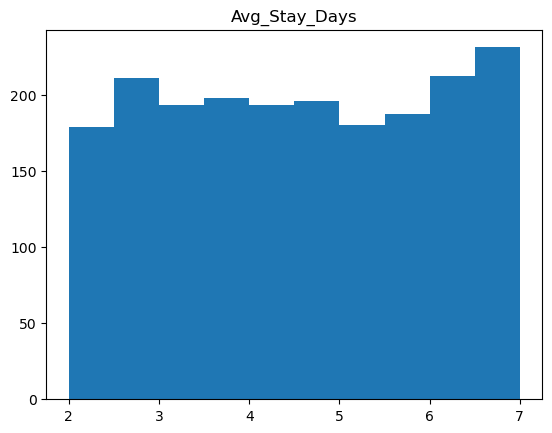

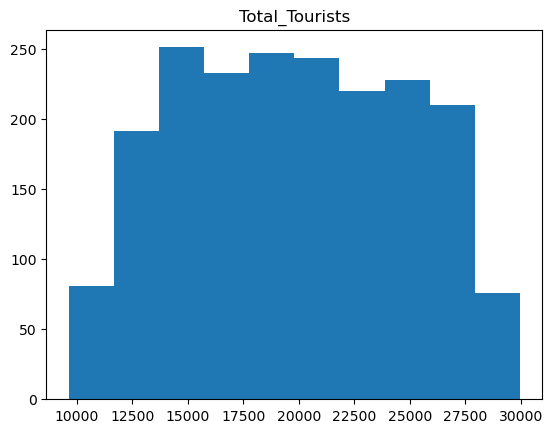

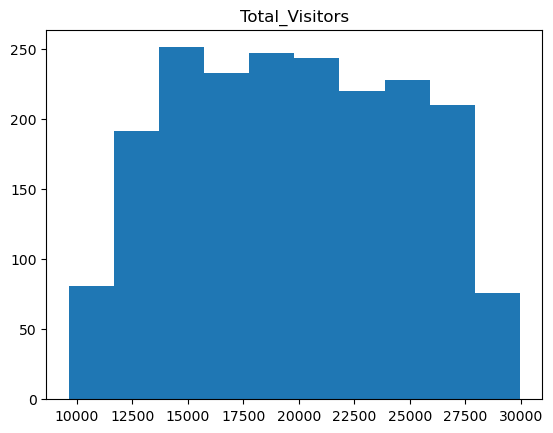

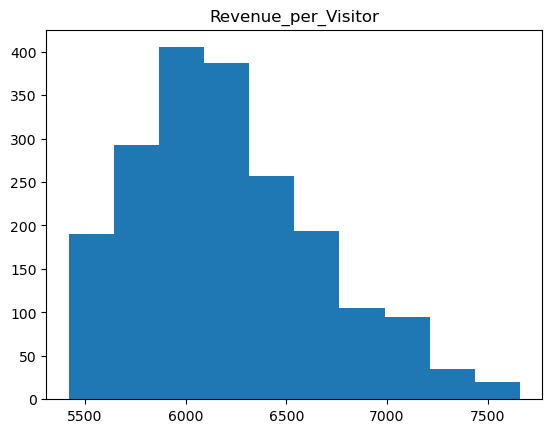

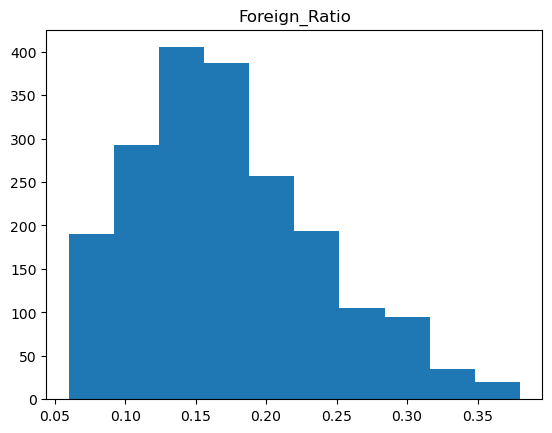

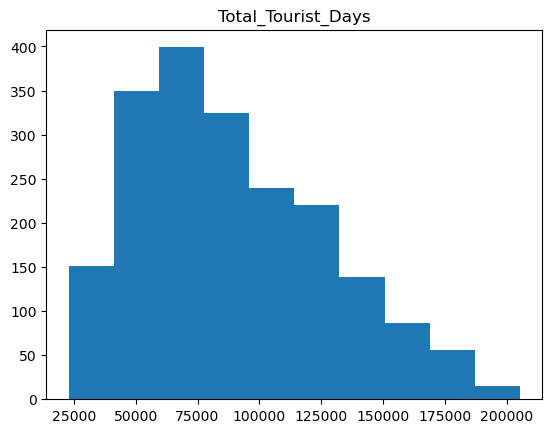

In [455]:
#making bell shaped 
import matplotlib.pyplot as plt 
for i in numaric.columns:
    plt.hist(numaric[i])
    plt.title(i)
    plt.show()#all they are are normulla distributed except year and 

In [456]:
df

,Year,Month,Destination,Domestic_Visitors,Foreign_Visitors,Revenue_INR,Avg_Stay_Days,Total_Tourists,Total_Visitors,Revenue_per_Visitor,Foreign_Ratio,Total_Tourist_Days,Season
0,2014,1,Srinagar,13266,4393,119046000,3.2,17659,17659,6741.378334,0.248768,56508.8,Winter
1,2014,1,Gulmarg,21377,2235,133705000,3.6,23612,23612,5662.586820,0.094655,85003.2,Winter
2,2014,1,Pahalgam,8755,1634,63383000,3.5,10389,10389,6100.972182,0.157282,36361.5,Winter
3,2014,1,Leh,20053,2704,132713000,3.2,22757,22757,5831.744079,0.118821,72822.4,Winter
4,2014,1,Sonamarg,14880,2276,101712000,2.3,17156,17156,5928.654698,0.132665,39458.8,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,2024,12,Anantnag,21566,4338,159886000,5.5,25904,25904,6172.251390,0.167464,142472.0,Winter
1976,2024,12,Baramulla,18643,4419,146243000,6.0,23062,23062,6341.297372,0.191614,138372.0,Winter
1977,2024,12,Rajouri,9913,3643,93281000,3.4,13556,13556,6881.159634,0.268737,46090.4,Winter
1978,2024,12,Budgam,9103,1721,66167000,4.0,10824,10824,6112.989653,0.158999,43296.0,Winter


In [457]:
# Z-score based outlier detection
def out_liears(column):
   mean=column.mean()
   std=column.std()
   z_score=(column/mean)/std
   return column[(z_score>3) | (z_score<-3)] 
print( out_liears(numaric["Total_Tourists"]))
print( out_liears(numaric["Total_Tourist_Days"]))
print( out_liears(numaric["Foreign_Ratio"]))
print( out_liears(numaric["Revenue_per_Visitor"]))
print( out_liears(numaric["Avg_Stay_Days"]))
print( out_liears(numaric["Revenue_INR"]))
print( out_liears(numaric["Foreign_Visitors"]))
print( out_liears(numaric["Domestic_Visitors"]))


Series([], Name: Total_Tourists, dtype: int64)
Series([], Name: Total_Tourist_Days, dtype: float64)
0       0.248768
1       0.094655
2       0.157282
3       0.118821
4       0.132665
          ...   
1975    0.167464
1976    0.191614
1977    0.268737
1978    0.158999
1979    0.253520
Name: Foreign_Ratio, Length: 1980, dtype: float64
Series([], Name: Revenue_per_Visitor, dtype: float64)
Series([], Name: Avg_Stay_Days, dtype: float64)
Series([], Name: Revenue_INR, dtype: int64)
Series([], Name: Foreign_Visitors, dtype: int64)
Series([], Name: Domestic_Visitors, dtype: int64)


In [458]:
data=df[["Revenue_per_Visitor","Revenue_INR"]]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data=scaler.fit_transform(data)

In [459]:
from sklearn.neighbors import NearestNeighbors
nn=NearestNeighbors(n_neighbors=10)
nn.fit(data)
d,i=nn.kneighbors(data)#d is distance and i is index numbers
print(d)
print(i)# for know the eps values

[[0.         0.00329397 0.01128045 ... 0.02753268 0.03095629 0.03582219]
 [0.         0.0088588  0.0129025  ... 0.01887152 0.0213401  0.02330758]
 [0.         0.00906129 0.01117622 ... 0.03395055 0.03613643 0.03847238]
 ...
 [0.         0.02156981 0.02235399 ... 0.04396502 0.04517873 0.04597168]
 [0.         0.0175719  0.02287572 ... 0.03705547 0.03729251 0.03902477]
 [0.         0.01517362 0.01905433 ... 0.04513635 0.0475489  0.04757793]]
[[   0 1163  280 ... 1646 1439 1332]
 [   1   43   22 ...  485  498  326]
 [   2 1348  154 ... 1383  946  351]
 ...
 [1977 1266 1097 ...  219 1789 1086]
 [1978  399    2 ... 1850 1626  431]
 [1979 1483  704 ...  882  758  400]]


In [460]:
type(df)

pandas.core.frame.DataFrame

**"We chose this because to know the expected value of EPS for DBSCAN."**


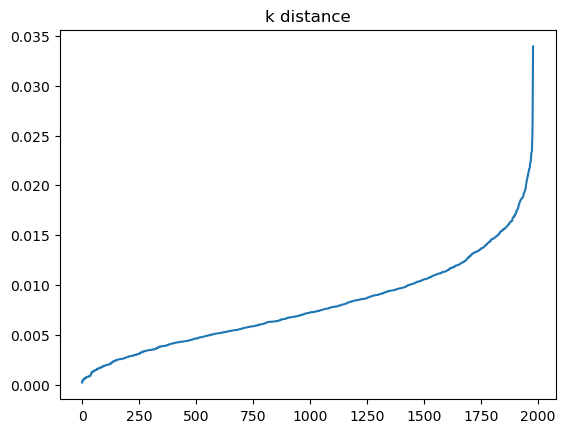

In [462]:

import numpy as np
d=d[:,1]
d=np.sort(d,axis=0)
plt.plot(d)
plt.title("k distance")
plt.show()

In [463]:
type(df)

pandas.core.frame.DataFrame

In [464]:
from sklearn.cluster import DBSCAN
import numpy as np
dbscan=DBSCAN(eps=0.016,min_samples=3)#eps=radius and min_simple = boarders how many points are in it is up to us how much
dbscan.fit(data)
labels=dbscan.labels_
print(labels)
print(np.unique(labels))
print(np.unique(labels,return_counts=True))

[ 0  1  2 ... -1 -1 91]
[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119]
(array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,

In [465]:
numaric.shape

(1980, 9)

In [466]:
#removel outlier
f=labels!=-1
numeric=numaric[f]
numeric.shape

(1785, 9)

In [467]:
final_df=pd.concat((numeric,categorical),axis=1)
final_df

,Domestic_Visitors,Foreign_Visitors,Revenue_INR,Avg_Stay_Days,Total_Tourists,Total_Visitors,Revenue_per_Visitor,Foreign_Ratio,Total_Tourist_Days,Destination,Month,Season
0,13266.0,4393.0,119046000.0,3.2,17659.0,17659.0,6741.378334,0.248768,56508.8,0,1,1
1,21377.0,2235.0,133705000.0,3.6,23612.0,23612.0,5662.586820,0.094655,85003.2,1,1,1
2,8755.0,1634.0,63383000.0,3.5,10389.0,10389.0,6100.972182,0.157282,36361.5,2,1,1
4,14880.0,2276.0,101712000.0,2.3,17156.0,17156.0,5928.654698,0.132665,39458.8,4,1,1
5,15847.0,1995.0,103175000.0,4.5,17842.0,17842.0,5782.703733,0.111815,80289.0,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,11,4
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,11,4
1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,12,1
1977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,12,1


In [468]:
type(df)

pandas.core.frame.DataFrame

In [469]:
from sklearn.preprocessing import LabelEncoder
encoder2=LabelEncoder()#creating object
df["Month"]=encoder2.fit_transform(df["Month"])
df

,Year,Month,Destination,Domestic_Visitors,Foreign_Visitors,Revenue_INR,Avg_Stay_Days,Total_Tourists,Total_Visitors,Revenue_per_Visitor,Foreign_Ratio,Total_Tourist_Days,Season
0,2014,0,Srinagar,13266,4393,119046000,3.2,17659,17659,6741.378334,0.248768,56508.8,Winter
1,2014,0,Gulmarg,21377,2235,133705000,3.6,23612,23612,5662.586820,0.094655,85003.2,Winter
2,2014,0,Pahalgam,8755,1634,63383000,3.5,10389,10389,6100.972182,0.157282,36361.5,Winter
3,2014,0,Leh,20053,2704,132713000,3.2,22757,22757,5831.744079,0.118821,72822.4,Winter
4,2014,0,Sonamarg,14880,2276,101712000,2.3,17156,17156,5928.654698,0.132665,39458.8,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,2024,11,Anantnag,21566,4338,159886000,5.5,25904,25904,6172.251390,0.167464,142472.0,Winter
1976,2024,11,Baramulla,18643,4419,146243000,6.0,23062,23062,6341.297372,0.191614,138372.0,Winter
1977,2024,11,Rajouri,9913,3643,93281000,3.4,13556,13556,6881.159634,0.268737,46090.4,Winter
1978,2024,11,Budgam,9103,1721,66167000,4.0,10824,10824,6112.989653,0.158999,43296.0,Winter


In [470]:
type(df)

pandas.core.frame.DataFrame

In [471]:
from sklearn.preprocessing import LabelEncoder
encoder2=LabelEncoder()#creating object
df["Destination"]=encoder2.fit_transform(df["Destination"])
df

,Year,Month,Destination,Domestic_Visitors,Foreign_Visitors,Revenue_INR,Avg_Stay_Days,Total_Tourists,Total_Visitors,Revenue_per_Visitor,Foreign_Ratio,Total_Tourist_Days,Season
0,2014,0,14,13266,4393,119046000,3.2,17659,17659,6741.378334,0.248768,56508.8,Winter
1,2014,0,4,21377,2235,133705000,3.6,23612,23612,5662.586820,0.094655,85003.2,Winter
2,2014,0,10,8755,1634,63383000,3.5,10389,10389,6100.972182,0.157282,36361.5,Winter
3,2014,0,9,20053,2704,132713000,3.2,22757,22757,5831.744079,0.118821,72822.4,Winter
4,2014,0,13,14880,2276,101712000,2.3,17156,17156,5928.654698,0.132665,39458.8,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,2024,11,0,21566,4338,159886000,5.5,25904,25904,6172.251390,0.167464,142472.0,Winter
1976,2024,11,1,18643,4419,146243000,6.0,23062,23062,6341.297372,0.191614,138372.0,Winter
1977,2024,11,12,9913,3643,93281000,3.4,13556,13556,6881.159634,0.268737,46090.4,Winter
1978,2024,11,2,9103,1721,66167000,4.0,10824,10824,6112.989653,0.158999,43296.0,Winter


In [472]:
from sklearn.preprocessing import LabelEncoder
encoder2=LabelEncoder()#creating object
df["Season"]=encoder2.fit_transform(df["Season"])
df

,Year,Month,Destination,Domestic_Visitors,Foreign_Visitors,Revenue_INR,Avg_Stay_Days,Total_Tourists,Total_Visitors,Revenue_per_Visitor,Foreign_Ratio,Total_Tourist_Days,Season
0,2014,0,14,13266,4393,119046000,3.2,17659,17659,6741.378334,0.248768,56508.8,3
1,2014,0,4,21377,2235,133705000,3.6,23612,23612,5662.586820,0.094655,85003.2,3
2,2014,0,10,8755,1634,63383000,3.5,10389,10389,6100.972182,0.157282,36361.5,3
3,2014,0,9,20053,2704,132713000,3.2,22757,22757,5831.744079,0.118821,72822.4,3
4,2014,0,13,14880,2276,101712000,2.3,17156,17156,5928.654698,0.132665,39458.8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,2024,11,0,21566,4338,159886000,5.5,25904,25904,6172.251390,0.167464,142472.0,3
1976,2024,11,1,18643,4419,146243000,6.0,23062,23062,6341.297372,0.191614,138372.0,3
1977,2024,11,12,9913,3643,93281000,3.4,13556,13556,6881.159634,0.268737,46090.4,3
1978,2024,11,2,9103,1721,66167000,4.0,10824,10824,6112.989653,0.158999,43296.0,3


In [473]:
type(df)

pandas.core.frame.DataFrame

**Separate features and target**

In [475]:
# Separate features and target
X = df.drop(['Revenue_INR'], axis=1)
y = df['Revenue_INR']

**Split into training and testing sets**

In [477]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(y_test)

215      88067000
161     105043000
135     108659000
386     155909000
674      85445000
          ...    
792     129312000
318     144293000
1902    162383000
621      95628000
1749    132801000
Name: Revenue_INR, Length: 396, dtype: int64


**Train the RandomForestRegressor**

In [479]:
from sklearn.ensemble import RandomForestRegressor#it is randomforest regressor
r= RandomForestRegressor(n_estimators=100)#how much modules works
r.fit(x_train,y_train)
y_pred=r.predict(x_test)
print(y_pred)

[8.7881120e+07 1.0432180e+08 1.0827770e+08 1.5637900e+08 8.5387640e+07
 8.5104650e+07 1.2317855e+08 1.0059968e+08 1.3820431e+08 1.4112359e+08
 1.2105243e+08 8.7537270e+07 1.0674952e+08 1.5984948e+08 1.1827294e+08
 1.1852570e+08 1.6162987e+08 1.2264697e+08 1.1509835e+08 1.1624988e+08
 1.1251092e+08 1.5893204e+08 1.0192786e+08 1.4058039e+08 1.0093443e+08
 1.7699331e+08 6.8304000e+07 9.9629010e+07 1.3030551e+08 1.3042793e+08
 1.1591633e+08 1.0059693e+08 9.7820380e+07 1.5301827e+08 8.8120370e+07
 1.6385666e+08 9.2801290e+07 9.4087840e+07 1.4836201e+08 1.6538516e+08
 1.4592988e+08 1.5404300e+08 1.4270260e+08 1.1605169e+08 8.1631290e+07
 1.3608442e+08 1.1157164e+08 1.0555801e+08 1.6125173e+08 1.5075273e+08
 1.2492053e+08 1.3666370e+08 8.4811980e+07 1.3859091e+08 1.2913802e+08
 1.4922181e+08 1.3740201e+08 1.1667323e+08 9.1918860e+07 1.2842167e+08
 1.7358671e+08 1.4087151e+08 1.0513502e+08 9.0835660e+07 1.3116526e+08
 1.3495337e+08 1.2615355e+08 7.5384540e+07 1.7670407e+08 1.0202642e+08
 1.044

**R2 Score Of  RandomForestRegressor**

In [481]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9993765655140161


**Train the KNeighborsRegressor**

In [483]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

**R2 Score Of KNeighborsRegressor**

In [485]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9675297011594283


**Cross-Validation Scores to check the overfitting in KNeighborsRegressor**

In [487]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

# Create model
model = KNeighborsRegressor()

# Fit on full dataset (optional for cross_val_score, but good practice)
model.fit(X, y)

# Now use cross_val_score properly
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validation scores:", scores)
print("Average R²:", scores.mean())

Cross-validation scores: [0.9692731  0.96963569 0.97092048 0.96848445 0.97303763]
Average R²: 0.9702702686445619


**Predict revenue for a custom input**


In [548]:
# You must match the input format exactly with the training data
sample_input = X.columns
empty_input = pd.DataFrame([np.zeros(len(sample_input))], columns=sample_input)
# Example: Set values manually (edit as needed)
empty_input.loc[0, 'Domestic_Visitors'] = 10000
empty_input.loc[0, 'Foreign_Visitors'] = 5000
empty_input.loc[0, 'Avg_Stay_Days'] = 3.5
empty_input.loc[0, 'Total_Tourists'] = 15000
# Set correct month and destination flags
empty_input.loc[0, 'Month'] = 1
empty_input.loc[0, 'Destination'] = 2
# Predict
predicted_revenue = knn.predict(empty_input)
print('Predicted Revenue (INR):', predicted_revenue[0])

Predicted Revenue (INR): 73677400.0


In [490]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit your model
model.fit(X_train, y_train)

# Evaluate
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)

Train Score: 0.9782292173859912
Test Score: 0.9831295466166371


### ***Model Evaluation Summary***
Training Accuracy: The model achieved a training accuracy of 97.82%, indicating that it fits the training data very well.

Testing Accuracy: The model performed with a testing accuracy of 98.31%, showing that it generalizes well to new, unseen data.

Conclusion: There is a minimal difference between the training and testing scores (~0.0049), which suggests that the model is neither overfitting nor underfitting. It performs well on both training and test data.